#The Sparks Foundation - GRIP 

Task : 3 Exploratory Data Analysis - Retail

By Kacem Rania

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [4]:
Superstore=pd.read_csv("SampleSuperstore.csv")

In [ ]:
Superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
Superstore.shape

(9994, 13)

In [6]:
Superstore.columns


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
Superstore.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

In [8]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
Superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#checking the duplicates records
Superstore.duplicated().sum()


17

In [11]:
#droping the duplicates records
Superstore=Superstore.drop_duplicates()

In [12]:
#final dimension
Superstore.shape

(9977, 13)

In [13]:
# Statistical analysis
Superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [14]:
Superstore.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

2 Integer type features
3 Float type features.
8 Object type features

In [15]:
data=Superstore.drop(columns='Postal Code')

In [16]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


Traiting the data

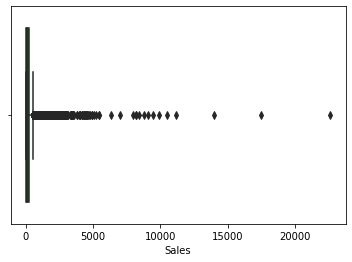

In [17]:
# Lets check the outliers for every features using boxplots.
sns.boxplot(x=data["Sales"],color='green')

In [ ]:
# Lets do the treatment for the outliers in Sales column using IQR Method.
# IQR measures the statistical dispersion of the data values in a measure of overall distribution.
for i in["Sales"]:
    q3,q1=np.percentile(data.loc[:,i],[75,25])
    iqr=q3-q1
    max=q3+(1.5*iqr)
    min=q1-(1.5*iqr)
    
    data.loc[data[i]<min,i]=np.nan
    data.loc[data[i]>max,i]=np.nan

In [18]:
data['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9977, dtype: float64

In [19]:
#Lets replace the nan values with the average values in Sales column.
data["Sales"].fillna(data["Sales"].mean(),inplace=True)

In [20]:
data['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9977, dtype: float64

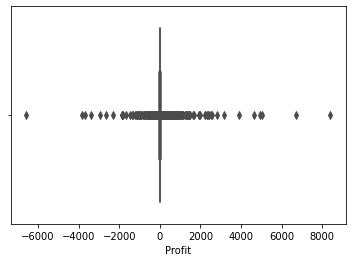

In [21]:
# Lets check outliers in Profit column
sns.boxplot(x=data['Profit'],color='Red')

In [22]:
for i in ['Profit']:
    q3, q1 = np.percentile(data.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
        
    data.loc[data[i] < min, i] = np.nan
    data.loc[data[i] > max, i] = np.nan

In [23]:
#replace the nan values with the average 

data['Profit'].fillna(data['Profit'].mean(), inplace = True)

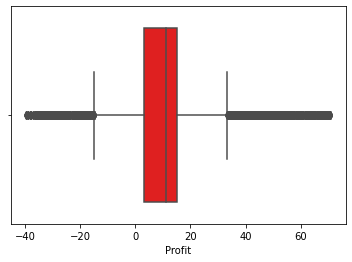

In [24]:
sns.boxplot(x = data['Profit'],color="Red")

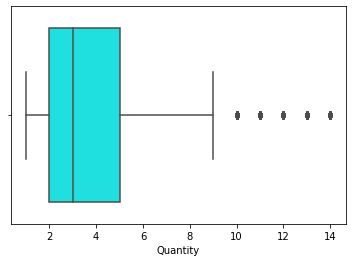

In [25]:
#outliers in Quantity Column.
sns.boxplot(x = data['Quantity'],color='cyan')

In [26]:
for i in ['Quantity']:
    q3, q1 = np.percentile(data.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    data.loc[data[i] < min, i] = np.nan
    data.loc[data[i] > max, i] = np.nan

In [27]:
data['Quantity'].fillna(data['Quantity'].mean(), inplace = True)

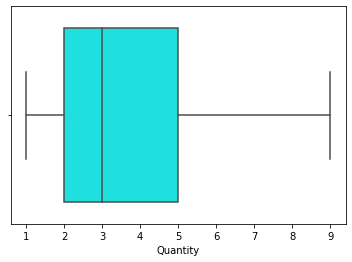

In [28]:
sns.boxplot(x = data['Quantity'],color="cyan")

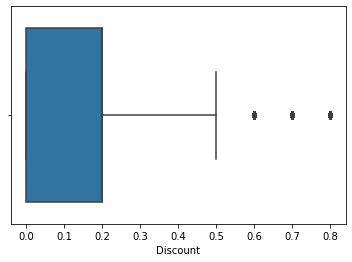

In [29]:
sns.boxplot(x = data['Discount'])

In [30]:
for i in ['Discount']:
    q3, q1 = np.percentile(data.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    data.loc[data[i] < min, i] = np.nan
    data.loc[data[i] > max, i] = np.nan

In [31]:
data['Discount'].fillna(data['Discount'].mean(), inplace = True)

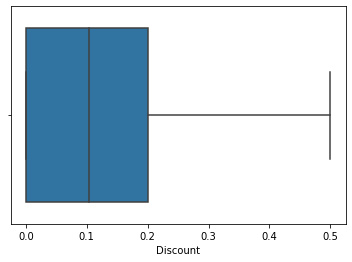

In [32]:
sns.boxplot(x = data['Discount'])

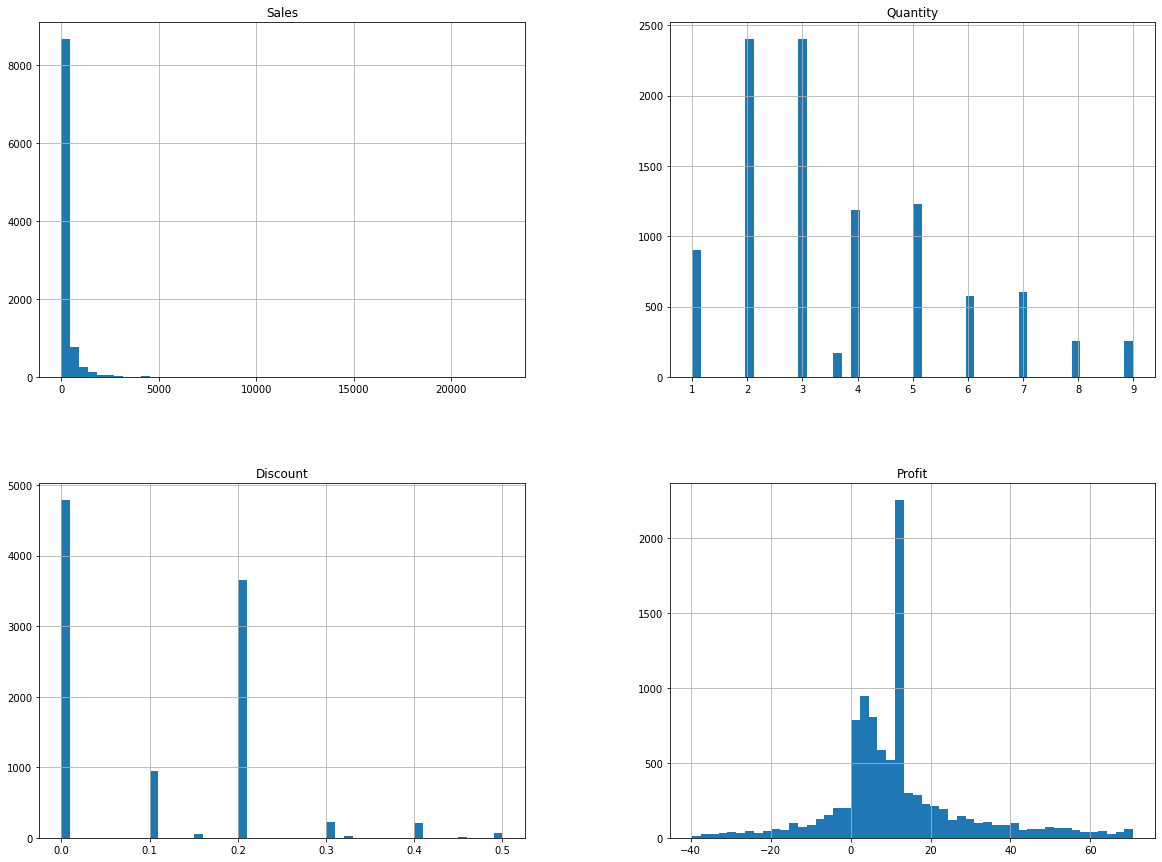

In [33]:
data.hist(bins=50 ,figsize=(20,15))
plt.show();

In [34]:
import random
import matplotlib.colors as mcolors

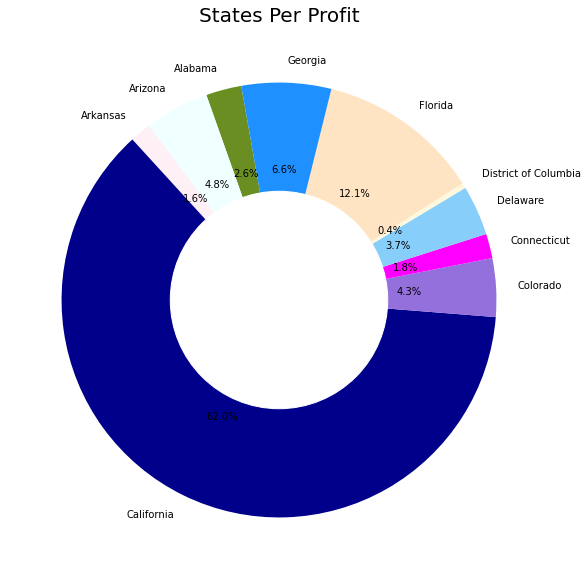

In [35]:
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)
d = data.groupby("State")["Sales"].sum().head(10)
plt.figure(figsize=(10,10))
plt.pie(d, labels=d.index, colors=colors,autopct='%1.1f%%',startangle=100)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("States Per Profit", fontsize=20)
plt.show()

#Profit per Category

In [39]:
Cat=pd.DataFrame()
Cat['Category']=data['Category']
Cat['Profit']=data.groupby('Category')['Profit'].transform('sum')
Cat.drop_duplicates(inplace=True)
Cat

,Category,Profit
0,Furniture,22099.692801
2,Office Supplies,62876.396516
7,Technology,30849.228486


#Profit per Sub-Category

In [40]:
Sub_cat=pd.DataFrame()
Sub_cat['Sub-Category']=data['Sub-Category']
Sub_cat['Profit']=data.groupby('Sub-Category')['Profit'].transform('sum')
Sub_cat.drop_duplicates(inplace=True)
Sub_cat

,Sub-Category,Profit
0,Bookcases,2335.289504
1,Chairs,5889.254829
2,Labels,3736.611463
3,Tables,2822.746267
4,Storage,8686.051851
5,Furnishings,11052.402202
6,Art,5813.045497
7,Phones,14946.866816
8,Binders,9615.131800
9,Appliances,7672.574523


#Areas with lowest Profit

In [41]:
Areas=pd.DataFrame()
Areas['Region']=data['Region']

#Sum of profit per Region

In [42]:
Areas['Profit']=data.groupby('Region')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas

,Region,Profit
0,South,19366.783270
2,West,44281.692743
14,Central,20474.318381
23,East,31702.523410


In [43]:
#Column city in areas contains each city 
Areas=pd.DataFrame()
Areas['City']=data['City']

#Sum of profit per City

In [44]:
Areas['Profit']=data.groupby('City')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas.head(10)

,City,Profit
0,Henderson,827.366462
2,Los Angeles,11274.521634
3,Fort Lauderdale,105.251965
12,Concord,517.499498
13,Seattle,6642.874612
14,Fort Worth,92.523630
16,Madison,167.862066
17,West Jordan,102.672300
18,San Francisco,7160.401375
21,Fremont,179.469600


#Cities with  highest loss to the lowest

In [45]:
loss_area=Areas[Areas['Profit']<0].sort_values(by=['Profit'],ascending=True)
loss_area.head()

,City,Profit
9223,Bryan,-58.671367
2171,San Angelo,-58.553200
3016,Pharr,-53.210767
2787,Corpus Christi,-43.730400
1642,Skokie,-42.273567


In [46]:
loss_area['City'].unique()

array(['Bryan', 'San Angelo', 'Pharr', 'Corpus Christi', 'Skokie',
       'Allen', 'York', 'Commerce City', 'Garland', 'League City',
       'Greensboro', 'Beaumont', 'Grand Prairie', 'Pueblo', 'Boca Raton',
       'San Marcos', 'Frisco', 'Romeoville', 'Wilson', 'Cuyahoga Falls',
       'Sanford', 'Peoria', 'Deer Park', 'Missouri City', 'Hamilton',
       'Tinley Park', 'Reading', 'Woodstock', 'Medina', 'Bolingbrook',
       'Mason', 'Irving', 'Abilene', 'Lubbock', 'Ormond Beach', 'Odessa',
       'Pensacola', 'Elyria', 'Altoona', 'Hickory', 'Broomfield', 'Tempe',
       'Fort Collins'], dtype=object)

In [47]:
loss_area['City'].shape[0]

43

In [48]:
print('There are {} weak Cities'.format(loss_area.shape[0]) )

There are 43 weak Cities


#Cities with  highest positive profit to the lowest

In [49]:
area=Areas[Areas['Profit']>0].sort_values(by=['Profit'],ascending=True)
area.head(10)

,City,Profit
5440,Jupiter,0.154800
9701,San Luis Obispo,1.194600
9399,Arlington Heights,1.234800
1574,El Paso,1.345533
9760,Springdale,1.419000
7317,Hillsboro,1.545500
1884,Keller,2.100000
339,Layton,2.331200
4421,Margate,2.332800
3027,Billings,2.693600


In [50]:
loss_area['City'].unique()

array(['Bryan', 'San Angelo', 'Pharr', 'Corpus Christi', 'Skokie',
       'Allen', 'York', 'Commerce City', 'Garland', 'League City',
       'Greensboro', 'Beaumont', 'Grand Prairie', 'Pueblo', 'Boca Raton',
       'San Marcos', 'Frisco', 'Romeoville', 'Wilson', 'Cuyahoga Falls',
       'Sanford', 'Peoria', 'Deer Park', 'Missouri City', 'Hamilton',
       'Tinley Park', 'Reading', 'Woodstock', 'Medina', 'Bolingbrook',
       'Mason', 'Irving', 'Abilene', 'Lubbock', 'Ormond Beach', 'Odessa',
       'Pensacola', 'Elyria', 'Altoona', 'Hickory', 'Broomfield', 'Tempe',
       'Fort Collins'], dtype=object)

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN SALES AND PROFIT')

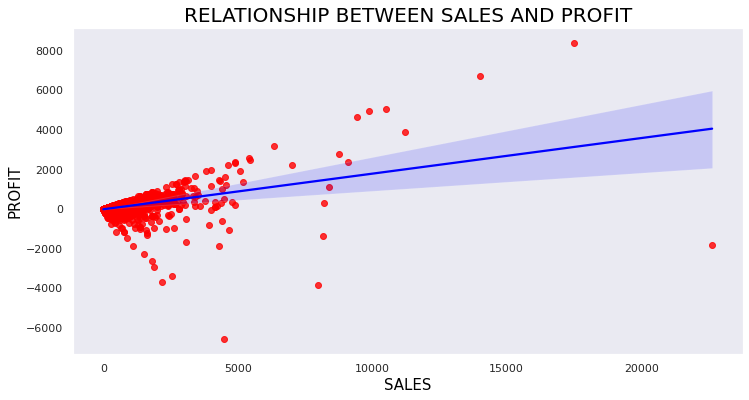

In [51]:
sns.set(style='dark')
plt.subplots(figsize=(12,6))
sns.regplot(x=Superstore['Sales'],y=Superstore['Profit'],color='red',line_kws={'color':'blue'})
plt.xlabel("SALES",fontdict={'color':'black','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("RELATIONSHIP BETWEEN SALES AND PROFIT",fontdict={'color':'black','fontsize':20})